In [3]:
'''
import matplotlib.pyplot as plt
import rasterio.plot

with rasterio.open("") as src:
    fig, ax = plt.subplots()
    rasterio.plot.show(src, ax=ax)
    provinces.boundary.plot(ax=ax, color="red")
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport rasterio.plot\n\nwith rasterio.open("") as src:\n    fig, ax = plt.subplots()\n    rasterio.plot.show(src, ax=ax)\n    provinces.boundary.plot(ax=ax, color="red")\nplt.show()\n'

In [ ]:
'''
# Load provinces
provinces = gpd.read_file("africa_provinces.shp").to_crs("EPSG:4326")

# Compute zonal stats for each soil variable
oc_stats = zonal_stats(provinces, "", stats=["mean"], geojson_out=False)
n_stats = zonal_stats(provinces, "", stats=["mean"], geojson_out=False)
ph_stats = zonal_stats(provinces, "", stats=["mean"], geojson_out=False)

# Combine into one DataFrame
soil_df = pd.DataFrame({
    "province": provinces["NAME_1"],
    "soil_OC": [r["mean"] for r in oc_stats],
    "soil_N": [r["mean"] for r in n_stats],
    "soil_pH": [r["mean"] for r in ph_stats]
})

# Save to CSV
soil_df.to_csv("africa_province_soil_properties.csv", index=False)
print("✅ Saved mean soil OC, N, and pH per province.")
'''

In [4]:
# !pip install geemap earthengine-api
#!pip install rasterio
# !pip install geopandas

In [4]:
'''
import ee

# Authenticate your account (opens browser for login)
ee.Authenticate()

# Initialize Earth Engine
ee.Initialize(project='prevision-rendement-agric-afri')
'''

"\nimport ee\n\n# Authenticate your account (opens browser for login)\nee.Authenticate()\n\n# Initialize Earth Engine\nee.Initialize(project='prevision-rendement-agric-afri')\n"

#####  NOTE:
Each time change the data so the info will change, this is how i make df for 5 line of dates 2020 to 2024

In [3]:
'''
# Africa boundary (simplified)
africa = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017") \
            .filter(ee.Filter.eq("wld_rgn", "Africa")) \
            .geometry() \
            .simplify(10000)   # reduce geometry complexity

# Use updated Sentinel-2 dataset
collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED") \
                .filterDate('2023-01-01', '2023-12-31') \
                .filterBounds(africa)

# Create median composite
image = collection.median()

# Export to Google Drive
task = ee.batch.Export.image.toDrive(
    image=image,
    description='Africa_S2',
    folder='earthengine',      # will appear in Drive/earthengine
    fileNamePrefix='Africa_S2',
    scale=5000,                # coarser resolution
    region=africa,
    maxPixels=1e13
)

task.start()
print("Task started! Check https://code.earthengine.google.com/tasks")
'''

'\n# Africa boundary (simplified)\nafrica = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")             .filter(ee.Filter.eq("wld_rgn", "Africa"))             .geometry()             .simplify(10000)   # reduce geometry complexity\n\n# Use updated Sentinel-2 dataset\ncollection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")                 .filterDate(\'2023-01-01\', \'2023-12-31\')                 .filterBounds(africa)\n\n# Create median composite\nimage = collection.median()\n\n# Export to Google Drive\ntask = ee.batch.Export.image.toDrive(\n    image=image,\n    description=\'Africa_S2\',\n    folder=\'earthengine\',      # will appear in Drive/earthengine\n    fileNamePrefix=\'Africa_S2\',\n    scale=5000,                # coarser resolution\n    region=africa,\n    maxPixels=1e13\n)\n\ntask.start()\nprint("Task started! Check https://code.earthengine.google.com/tasks")\n'

In [7]:
#ls

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## WorldClim Files Parsing and Preporcessing

#### File = POWER_Regional_Monthly_2020_2024.csv

In [2]:
prm_data = pd.read_csv('Temperature')
prm_data

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,T2M,2020,-0.5,18.750,25.74,26.07,25.55,25.58,25.24,24.81,24.49,24.94,24.53,24.40,24.55,24.94,25.07
1,T2M,2020,-0.5,19.375,25.82,25.85,25.58,25.73,25.20,24.76,24.37,24.76,24.50,24.36,24.45,24.93,25.02
2,T2M,2020,-0.5,20.000,26.02,26.55,26.17,26.31,25.44,24.80,24.37,24.73,24.55,24.31,24.51,24.94,25.22
3,T2M,2020,-0.5,20.625,26.34,26.92,26.62,26.82,25.82,25.01,24.46,24.75,24.55,24.39,24.59,24.94,25.43
4,T2M,2020,-0.5,21.250,25.35,25.76,25.47,25.57,25.32,24.84,24.32,24.51,24.26,24.19,24.23,24.56,24.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,T2M,2024,3.5,20.000,25.65,27.27,27.78,26.80,26.55,25.71,25.49,25.25,25.58,25.35,25.10,25.62,26.01
661,T2M,2024,3.5,20.625,25.26,26.87,27.65,26.72,26.36,25.50,25.21,24.95,25.22,25.03,24.83,25.44,25.75
662,T2M,2024,3.5,21.250,24.41,26.30,27.46,26.40,26.15,25.02,24.70,24.36,24.58,24.46,24.32,24.90,25.25
663,T2M,2024,3.5,21.875,24.12,26.34,27.64,27.02,26.76,25.20,24.79,24.34,24.54,24.29,24.25,25.10,25.36


In [10]:
list_mean_ann = []


for i in range(2020, 2025):
    if i == 2020:
        mask = prm_data['YEAR'] == 2020
        mean_ann_2020 = prm_data.loc[mask, 'ANN'].mean()
        list_mean_ann.append(mean_ann_2020)

    elif i == 2021:
        mask = prm_data['YEAR'] == 2021
        mean_ann_2021 = prm_data.loc[mask, 'ANN'].mean()
        list_mean_ann.append(mean_ann_2021)

    elif i == 2022:
        mask = prm_data['YEAR'] == 2022
        mean_ann_2022 = prm_data.loc[mask, 'ANN'].mean()
        list_mean_ann.append(mean_ann_2022)

    elif i == 2023:
        mask = prm_data['YEAR'] == 2023
        mean_ann_2023 = prm_data.loc[mask, 'ANN'].mean()
        list_mean_ann.append(mean_ann_2023)

    elif i == 2024:
        mask = prm_data['YEAR'] == 2024
        mean_ann_2024 = prm_data.loc[mask, 'ANN'].mean()
        list_mean_ann.append(mean_ann_2024)

list_mean_ann

[25.069097744360903,
 24.68172932330827,
 24.774436090225564,
 25.804135338345866,
 26.858947368421052]

In [11]:
list_mean_ann = pd.DataFrame(list_mean_ann, columns=['Temp'])
print(list_mean_ann)

        Temp
0  25.069098
1  24.681729
2  24.774436
3  25.804135
4  26.858947


#### File = RainFall csv

In [12]:
rain_data = pd.read_csv('Rainfall')
rain_data.head(4)

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PRECTOTCORR,2020,-0.5,20.000,2.06,3.36,5.13,4.41,8.98,4.74,7.75,3.43,6.78,6.35,7.33,5.12,5.46
1,PRECTOTCORR,2020,-0.5,20.625,2.45,3.68,3.74,3.14,7.30,4.64,8.56,4.56,5.98,5.55,6.59,4.19,5.04
2,PRECTOTCORR,2020,-0.5,21.250,3.09,4.16,4.09,3.20,6.54,3.44,6.43,5.99,5.54,5.79,7.23,4.58,5.01
3,PRECTOTCORR,2020,-0.5,21.875,3.02,4.43,4.13,3.35,6.81,3.42,5.81,5.73,5.49,6.00,7.42,4.68,5.03


In [13]:
list_mean_ann_rainfall = []

for i in range(2020, 2025):
    if i == 2020:
        mask = rain_data['YEAR'] == 2020
        mean_ann_2020 = rain_data.loc[mask, 'ANN'].mean()
        list_mean_ann_rainfall.append(mean_ann_2020)

    elif i == 2021:
        mask = rain_data['YEAR'] == 2021
        mean_ann_2021 = rain_data.loc[mask, 'ANN'].mean()
        list_mean_ann_rainfall.append(mean_ann_2021)

    elif i == 2022:
        mask = rain_data['YEAR'] == 2022
        mean_ann_2022 = rain_data.loc[mask, 'ANN'].mean()
        list_mean_ann_rainfall.append(mean_ann_2022)

    elif i == 2023:
        mask = rain_data['YEAR'] == 2023
        mean_ann_2023 = rain_data.loc[mask, 'ANN'].mean()
        list_mean_ann_rainfall.append(mean_ann_2023)

    elif i == 2024:
        mask = rain_data['YEAR'] == 2024
        mean_ann_2024 = rain_data.loc[mask, 'ANN'].mean()
        list_mean_ann_rainfall.append(mean_ann_2024)

list_mean_ann_rainfall

[4.426388888888889,
 4.417013888888889,
 5.240138888888889,
 3.9189583333333338,
 4.339166666666667]

In [14]:
list_mean_ann_rainfall = pd.DataFrame(list_mean_ann_rainfall, columns=['Rainfall'])
list_mean_ann_rainfall

,Rainfall
0,4.426389
1,4.417014
2,5.240139
3,3.918958
4,4.339167


## FAO Files Parsing and Preporcessing

#### Steps to obtain values from .tif files:

1: Download the .tif files for each property (soil_ph, soil_oc, soil_n, etc.).

2: Load them with a library like rasterio in Python.

3: Clip or extract values for:

    * A specific point (latitude/longitude).

    * A polygon (your study area or farm boundary).

    * Or compute statistics (mean, median, std) for the whole raster.

4: Combine extracted values into a DataFrame for analysis.

#### FAO for Soil Nitrogen

In [15]:
import rasterio
import geopandas as gpd
import random
from pyproj import Transformer

In [16]:
with rasterio.open("fao_soil_n.tif") as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)  # left, bottom, right, top

CRS: EPSG:4326
Bounds: BoundingBox(left=3.9997999999999987, bottom=5.0, right=21.482, top=9.4072)


In [17]:
with rasterio.open("fao_soil_n.tif") as src:
    band1 = src.read(1)  # read the first band
    print("Min:", np.nanmin(band1))
    print("Max:", np.nanmax(band1))
    print("Unique values sample:", np.unique(band1)[:20])


Min: 0
Max: 1161
Unique values sample: [ 0 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


In [29]:
'''
soil_df = []

for i in range(1, 6):
    lon = random.uniform(5.0, 11.0)
    lat = random.uniform(5.0, 11.0)
    
    with rasterio.open("fao_soil_n.tif") as src:
        # if raster is EPSG:4326, you can use sample directly
        for val in src.sample([(lat, lon)]):
            print(f"Soil Nitrogen at ({lat}, {lon}): {val}")
            soil_df.append(val)
'''

'\nsoil_df = []\n\nfor i in range(1, 6):\n    lon = random.uniform(5.0, 11.0)\n    lat = random.uniform(5.0, 11.0)\n    \n    with rasterio.open("fao_soil_n.tif") as src:\n        # if raster is EPSG:4326, you can use sample directly\n        for val in src.sample([(lat, lon)]):\n            print(f"Soil Nitrogen at ({lat}, {lon}): {val}")\n            soil_df.append(val)\n'

In [28]:
soil_n = pd.DataFrame(soil_df, columns=['soil_N'])
soil_n

,soil_N
0,232
1,116
2,207
3,171
4,75


##### FAO for Soil Organic

In [30]:
with rasterio.open("fao_soil_oc.tif") as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)  # left, bottom, right, top

CRS: EPSG:4326
Bounds: BoundingBox(left=3.9997999999999987, bottom=5.0, right=21.482, top=9.4072)


In [31]:
with rasterio.open("fao_soil_oc.tif") as src:
    band1 = src.read(1)  # read the first band
    print("Min:", np.nanmin(band1))
    print("Max:", np.nanmax(band1))
    print("Unique values sample:", np.unique(band1)[:20])

Min: 0
Max: 1405
Unique values sample: [ 0 32 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52]


In [45]:
'''
soil_oc_df = []

for i in range(1, 6):
    lon = random.uniform(5.0, 11.0)
    lat = random.uniform(5.0, 11.0)
    
    with rasterio.open("fao_soil_oc.tif") as src:
        # if raster is EPSG:4326, you can use sample directly
        for val in src.sample([(lat, lon)]):
            print(f"Soil Nitrogen at ({lat}, {lon}): {val}")
            soil_oc_df.append(val)
'''            

Soil Nitrogen at (8.110267228012788, 6.380974782490672): [128]
Soil Nitrogen at (5.864849684384861, 6.258397709404296): [118]
Soil Nitrogen at (6.3818494493404785, 7.536331288842305): [64]
Soil Nitrogen at (10.485682201207386, 8.108598419205629): [78]
Soil Nitrogen at (10.409841206257644, 8.151143824384256): [77]


In [46]:
soil_oc = pd.DataFrame(soil_oc_df, columns=['soil_OC'])
soil_oc

,soil_OC
0,128
1,118
2,64
3,78
4,77


##### FAO for Soil PH Water

In [47]:
with rasterio.open("fao_soil_ph.tif") as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)  # left, bottom, right, top

CRS: EPSG:4326
Bounds: BoundingBox(left=3.9997999999999987, bottom=5.0, right=21.482, top=9.4072)


In [48]:
with rasterio.open("fao_soil_ph.tif") as src:
    band1 = src.read(1)  # read the first band
    print("Min:", np.nanmin(band1))
    print("Max:", np.nanmax(band1))
    print("Unique values sample:", np.unique(band1)[:20])

Min: 0
Max: 82
Unique values sample: [ 0 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]


In [66]:
'''
soil_ph_df = []

for i in range(1, 6):
    lon = random.uniform(5.0, 11.0)
    lat = random.uniform(5.0, 11.0)
    
    with rasterio.open("fao_soil_ph.tif") as src:
        # if raster is EPSG:4326, you can use sample directly
        for val in src.sample([(lat, lon)]):
            print(f"Soil Nitrogen at ({lat}, {lon}): {val}")
            soil_ph_df.append(val)
'''

Soil Nitrogen at (6.513339452280059, 5.642653373353663): [51]
Soil Nitrogen at (9.150731937238, 7.919020221565979): [57]
Soil Nitrogen at (10.874013491130658, 5.58207820485452): [54]
Soil Nitrogen at (7.3364159077227695, 5.9819708191681995): [53]
Soil Nitrogen at (9.426602440204434, 9.380734449023647): [58]


In [70]:
soil_ph_df = pd.DataFrame(soil_ph_df, columns=['soil_ph'])

soil_ph_df

,soil_ph
0,51
1,57
2,54
3,53
4,58


### Yield Data (FAO Statistics)

In [3]:
fao_df = pd.read_csv("FAO.csv", encoding="latin1")
fao_df.head(2)

,ï»¿Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,2,Africa,5312,Area harvested,1929.07,"Abaca, manila hemp, raw",2019,2019,ha,1909.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,2,Africa,5412,Yield,1929.07,"Abaca, manila hemp, raw",2019,2019,kg/ha,148.3,E,Estimated value,NaN


##### To calculate yield (t/ha) from FAO stats you need three elements:

1: Production (tonnes)

2: Area harvested (hectares)

3: Then:
           
           Yield (t/ha) = Production / Area harvested



In [4]:
# Check available elements
print(fao_df["Element"].unique())

['Area harvested' 'Yield' 'Production']


In [5]:
# Filter rows containing 'Yield'
yield_df = fao_df[fao_df["Element"].str.contains("Yield", case=False, na=False)].copy()

# Rename for clarity
yield_df = yield_df.rename(columns={"Value": "yield_raw"})

# Convert hg/ha → t/ha if needed
if "hg/ha" in yield_df["Unit"].unique():
    yield_df["yield_t_ha"] = yield_df["yield_raw"] / 10000
else:
    yield_df["yield_t_ha"] = yield_df["yield_raw"]

# Keep only yield column
yield_final = yield_df[["yield_t_ha"]].reset_index(drop=True)

   yield_t_ha
0       148.3
1       152.1
2       154.2
3       154.9
4       154.7


In [6]:
print(yield_final)

     yield_t_ha
0         148.3
1         152.1
2         154.2
3         154.9
4         154.7
..          ...
680      8119.2
681      8171.7
682      8302.4
683      8469.4
684      8373.7

[685 rows x 1 columns]


In [74]:
yield_final.shape

(685, 1)

In [75]:
# Option 1: Using head()
yield_final.head(5)

# Option 2: Using slicing
yield_final[:5]

# Option 3: Explicit iloc
fao_yield = yield_final.iloc[0:5]
fao_yield

,yield_t_ha
0,148.3
1,152.1
2,154.2
3,154.9
4,154.7


In [76]:
fao_yield.shape

(5, 1)

## Sentinel Image Parsing and Preporcessing

#### Summary (Sentinel images for yield prediction):
● Collect Sentinel-2 (and possibly Sentinel-1) images for the study area.

● Preprocess (atmospheric correction, cloud masking, clipping to region).

● Extract indices like NDVI, EVI, NDWI, LAI to describe vegetation and water stress.

● Build time-series features across the crop season to capture growth patterns.

#### Step 2. Cloud masking:

Preprocess (atmospheric correction, cloud masking, clipping to region).

In GEE, you can export your image with cloud masking applied (e.g., using QA60, or better: SCL band from Level-2A). But since you already downloaded, you can do it locally too.

If you exported QA60 band:

In [77]:
import rasterio

##### Open the exported Sentinel image

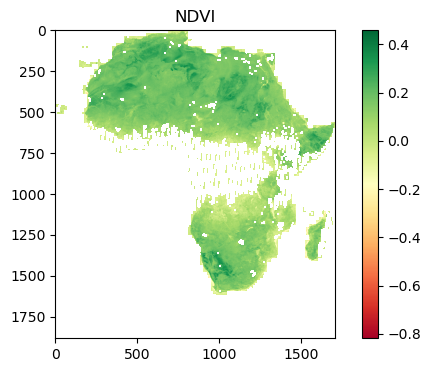

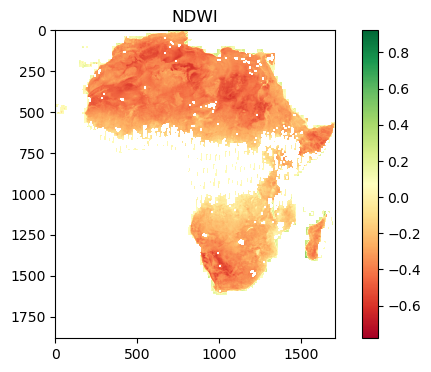

C:\Users\Mewandi\AppData\Local\Temp\ipykernel_10616\1287970201.py:24: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)
C:\Users\Mewandi\AppData\Local\Temp\ipykernel_10616\1287970201.py:27: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)


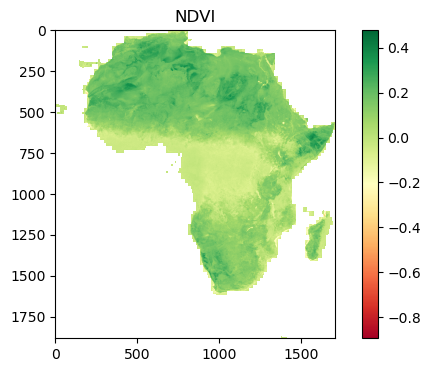

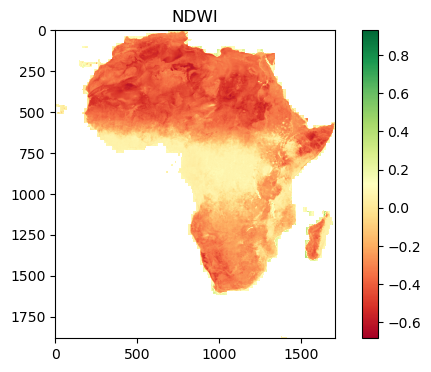

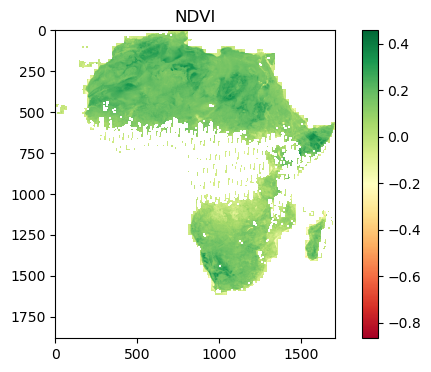

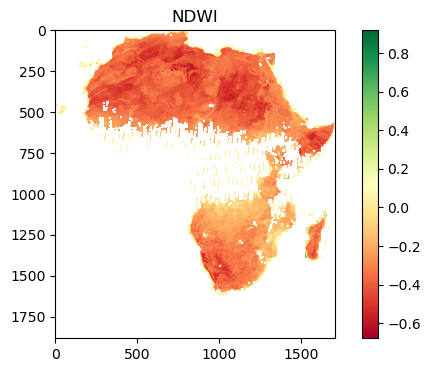

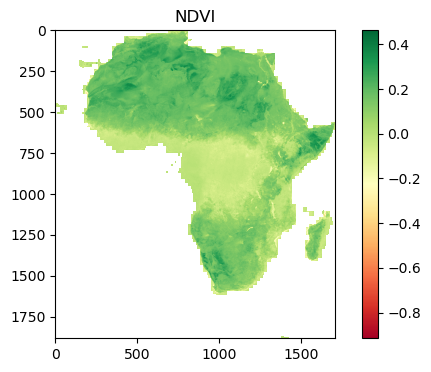

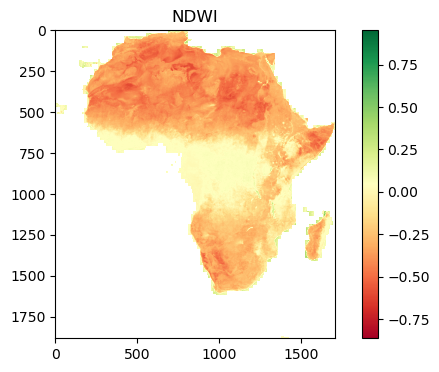

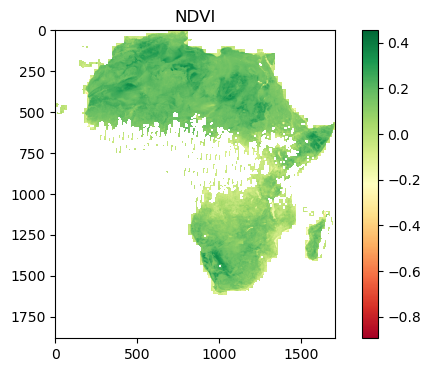

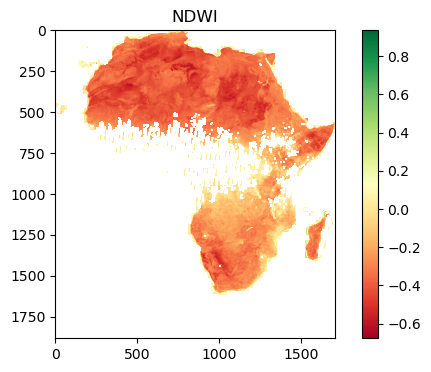

In [78]:
for i in range(20, 25):
    with rasterio.open(f"Sentinel_{i}.tif") as src:
        # print(f'bands number of Sentinel_{i}:', src.count) 
        # print(src.descriptions)  # band names (if available)
    
        # Example: Read bands by index
        blue = src.read(1)   # B02
        green = src.read(2)  # B03
        red = src.read(3)    # B04
        nir = src.read(4)    # B08
        qa_data = src.read(23)   # QA60
    
        # Cloud mask (QA60 > 0 = cloudy)
        mask = qa_data == 0
    
        blue[~mask] = np.nan
        green[~mask] = np.nan
        red[~mask] = np.nan
        nir[~mask] = np.nan

        # Step 3:
        # Extract indices like NDVI, EVI, NDWI, LAI to describe vegetation and water stress.
        # NDVI = (NIR - Red) / (NIR + Red)
        ndvi = (nir - red) / (nir + red)
        
        # NDWI = (Green - NIR) / (Green + NIR)
        ndwi = (green - nir) / (green + nir)

        # Visaulization of NDVI 
        plt.figure(figsize=(7,4))
        plt.imshow(ndvi, cmap="RdYlGn")
        plt.colorbar()
        plt.title("NDVI")
        plt.show()

        # Visaulization of NDWI
        plt.figure(figsize=(7,4))
        plt.imshow(ndwi, cmap="RdYlGn")
        plt.colorbar()
        plt.title("NDWI")
        plt.show()

#### maize-growing:
As we don’t yet have a shapefile of the maize-growing regions, so we manually define a bounding box (lat/lon coordinates).

In [79]:
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import box

# Define bounding box (minx, miny, maxx, maxy)
bbox = box(30.1, -1.9, 30.5, -1.5)  
for i in range(20, 25):
    with rasterio.open(f"Sentinel_{i}.tif") as src:
        geo = gpd.GeoDataFrame({"geometry": [bbox]}, crs=src.crs)
    
        # Clip to bounding box
        out_image, out_transform = mask(src, geo.geometry, crop=True)
    
        print("Clipped image shape:", out_image.shape)

Clipped image shape: (26, 10, 10)
Clipped image shape: (26, 10, 10)
Clipped image shape: (26, 10, 10)
Clipped image shape: (26, 10, 10)
Clipped image shape: (26, 10, 10)


#### Summarize NDVI / NDWI for each image
Right now ndvi is a 2D array (pixels). For ML, you usually want summary statistics:

#### 1: NDVI Flatten and remove NaN

In [80]:
import rasterio
import numpy as np
import pandas as pd

all_stats = []  # list to store yearly stats

for i in range(20, 25):   # 2020 → 2024
    with rasterio.open(f"Sentinel_{i}.tif") as src:
        blue = src.read(1)   # B02
        green = src.read(2)  # B03
        red = src.read(3)    # B04
        nir = src.read(4)    # B08
        qa_data = src.read(23)   # QA60 (cloud mask)

        # Mask clouds
        mask = qa_data == 0
        blue[~mask] = np.nan
        green[~mask] = np.nan
        red[~mask] = np.nan
        nir[~mask] = np.nan

        # NDVI
        ndvi = (nir - red) / (nir + red)
        ndvi_values = ndvi.flatten()
        ndvi_values = ndvi_values[~np.isnan(ndvi_values)]

        # NDWI
        ndwi = (green - nir) / (green + nir)
        ndwi_values = ndwi.flatten()
        ndwi_values = ndwi_values[~np.isnan(ndwi_values)]

        # Collect statistics
        ndvi_stats = {
            "date": f"20{i}-06-01",  # example date
            "ndvi_mean": np.mean(ndvi_values),
            "ndvi_median": np.median(ndvi_values),
            "ndvi_std": np.std(ndvi_values),
            "ndwi_mean": np.mean(ndwi_values),
            "ndwi_median": np.median(ndwi_values),
            "ndwi_std": np.std(ndwi_values),
        }

        all_stats.append(ndvi_stats)

# ✅ Convert list of dicts → DataFrame
seriel_df = pd.DataFrame(all_stats)

C:\Users\Mewandi\AppData\Local\Temp\ipykernel_10616\3511608794.py:23: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)
C:\Users\Mewandi\AppData\Local\Temp\ipykernel_10616\3511608794.py:28: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)


In [81]:
seriel_df

,date,ndvi_mean,ndvi_median,ndvi_std,ndwi_mean,ndwi_median,ndwi_std
0,2020-06-01,0.106612,0.136281,0.111149,-0.239527,-0.291001,0.191910
1,2021-06-01,0.102027,0.130391,0.113494,-0.224555,-0.277428,0.204140
2,2022-06-01,0.110167,0.139423,0.109249,-0.244615,-0.295055,0.187853
3,2023-06-01,0.101090,0.132112,0.114190,-0.222102,-0.276681,0.199997
4,2024-06-01,0.111665,0.143048,0.111483,-0.244117,-0.297247,0.192917


#### Step 4:
Build time-series features across the crop season to capture growth patterns.

###### NOTE:
time series means “values changing across time,” one single image isn’t a time series — it’s just one observation.
To turn it into a time series, you need multiple images from different dates.

In [82]:
# seriel_df.set_index("date", inplace=True)
# print(seriel_df)

#### Now we creat our Sentinel Data

In [83]:
sentinel_df = seriel_df[['date', 'ndvi_mean', 'ndwi_mean']]

In [84]:
sentinel_df

,date,ndvi_mean,ndwi_mean
0,2020-06-01,0.106612,-0.239527
1,2021-06-01,0.102027,-0.224555
2,2022-06-01,0.110167,-0.244615
3,2023-06-01,0.101090,-0.222102
4,2024-06-01,0.111665,-0.244117


### Now it is time to merge all datas as once

In [85]:
'''
afr_agri_df = []
afr_agri_df.append(sentinel_df)
afr_agri_df.append(soil_ph_df)
afr_agri_df.append(soil_oc)
afr_agri_df.append(soil_n)
afr_agri_df.append(list_mean_ann_rainfall)
afr_agri_df.append(list_mean_ann)
'''

'\nafr_agri_df = []\nafr_agri_df.append(sentinel_df)\nafr_agri_df.append(soil_ph_df)\nafr_agri_df.append(soil_oc)\nafr_agri_df.append(soil_n)\nafr_agri_df.append(list_mean_ann_rainfall)\nafr_agri_df.append(list_mean_ann)\n'

In [86]:
afr_agri_df = pd.concat([sentinel_df,list_mean_ann_rainfall], axis=1)

In [87]:
afr_agri_df = pd.concat([afr_agri_df,list_mean_ann], axis=1)
afr_agri_df = pd.concat([afr_agri_df,soil_oc], axis=1)
afr_agri_df = pd.concat([afr_agri_df,soil_n], axis=1)
afr_agri_df = pd.concat([afr_agri_df,soil_ph_df], axis=1)
afr_agri_df = pd.concat([afr_agri_df,fao_yield], axis=1)

In [88]:
afr_agri_df

,date,ndvi_mean,ndwi_mean,Rainfall,Temp,soil_OC,soil_N,soil_ph,yield_t_ha
0,2020-06-01,0.106612,-0.239527,4.426389,25.069098,128,232,51,148.3
1,2021-06-01,0.102027,-0.224555,4.417014,24.681729,118,116,57,152.1
2,2022-06-01,0.110167,-0.244615,5.240139,24.774436,64,207,54,154.2
3,2023-06-01,0.101090,-0.222102,3.918958,25.804135,78,171,53,154.9
4,2024-06-01,0.111665,-0.244117,4.339167,26.858947,77,75,58,154.7


## Let's apply Random Forest Method to predict yield

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [90]:
x = afr_agri_df.drop(columns=["date", "yield_t_ha"])
y = afr_agri_df['yield_t_ha']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [93]:
pred_yield = model.predict(x_test)

In [94]:
print("Predictions:", pred_yield)
print("MSE:", mean_squared_error(y_test, pred_yield))

Predictions: [152.429]
MSE: 0.10824100000000508


#### Let's apply our one data test

In [99]:
import pandas as pd

# Collect user input as numbers
ndvi_mean = float(input("Please enter the NDVI mean value: "))
ndwi_mean = float(input("Please enter the NDWI mean value: "))
Rainfall = float(input("Please enter the Rainfall value: "))     # capital R
Temp = float(input("Please enter the Temperature value: "))      # capital T
soil_OC = float(input("Please enter the Soil_OC value: "))       # exact match
soil_nitrogen = float(input("Please enter the Soil_N value: "))  # exact match
soil_ph = float(input("Please enter the Soil_PH value: "))

# ✅ Match training feature names exactly
df = pd.DataFrame([{
    "ndvi_mean": ndvi_mean,
    "ndwi_mean": ndwi_mean,
    "Rainfall": Rainfall,
    "Temp": Temp,
    "soil_OC": soil_OC,
    "soil_N": soil_nitrogen,
    "soil_ph": soil_ph
}])

# Predict
pred = model.predict(df)

print("\n\n\n Our yield prediction of 2025 is:", pred[0])

Please enter the NDVI mean value:  0.122211
Please enter the NDWI mean value:  -0.320902
Please enter the Rainfall value:  5.340029
Please enter the Temperature value:  26.929864
Please enter the Soil_OC value:  130
Please enter the Soil_N value:  300
Please enter the Soil_PH value:  60





 Our yield prediction of 2025 is: 152.05499999999992


### Let's use XGBoost method, to chick which one is more accurate

##### Explination:


XGBoost stands for Extreme Gradient Boosting. It is an advanced implementation of the Gradient Boosting algorithm designed to be faster, more efficient, and more accurate.

   * It builds models in a sequential way (like boosting), where each new model tries to fix the errors of the previous one.

   * It is optimized for speed and performance, using parallel computing, tree pruning, and regularization to prevent overfitting.

   * It works with decision trees as base learners.

##### 🛠️ Usage of XGBoost:

XGBoost is widely used in machine learning competitions (like Kaggle) and industry applications because of its high accuracy and scalability.

  * It’s commonly used for:

      ** Classification tasks: spam detection, fraud detection, churn prediction.

      ** Regression tasks: predicting house prices, crop yield, demand forecasting.

      ** Ranking tasks: search engine ranking, recommendation systems.

      ** Time-series forecasting (with feature engineering).

##### 📊 What kind of data is it used for?

  * XGBoost works well with:

      ** Structured/tabular data (CSV, Excel, databases).

      ** Both small and large datasets (scales well to millions of rows).

      ** Numerical and categorical features (though categorical need encoding, e.g., one-hot or label encoding).

      ** Problems where accuracy is critical and the dataset is not purely unstructured (e.g., not raw images/audio/text — deep learning is usually better there).

##### 🔑 Key Rule:

  * Use XGBClassifier → when your y is categories (like 0/1, or multi-class labels).

  * Use XGBRegressor → when your y is continuous (like yield in tons/ha, prices, rainfall,...)

In [ ]:
# !pip install xgboost

In [100]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [101]:
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_train)

print(y_pred)

[154.6999  154.20006 148.30113 154.899  ]


In [102]:
y_pred.mean()

153.02502